Tarea 1 - Calculo para ciencia de datos
Camila Basulto
Julián Vargas
Joaquín Cabello


1. Regresión Exponencial

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
p1_data = pd.read_csv('P1grupo_2.csv')
p1_data.head()

,x,y
0,0.006,1.496452
1,0.012,1.278785
2,0.021,1.567729
3,0.053,1.862298
4,0.078,1.599181


Vemos cómo se ven los datos  

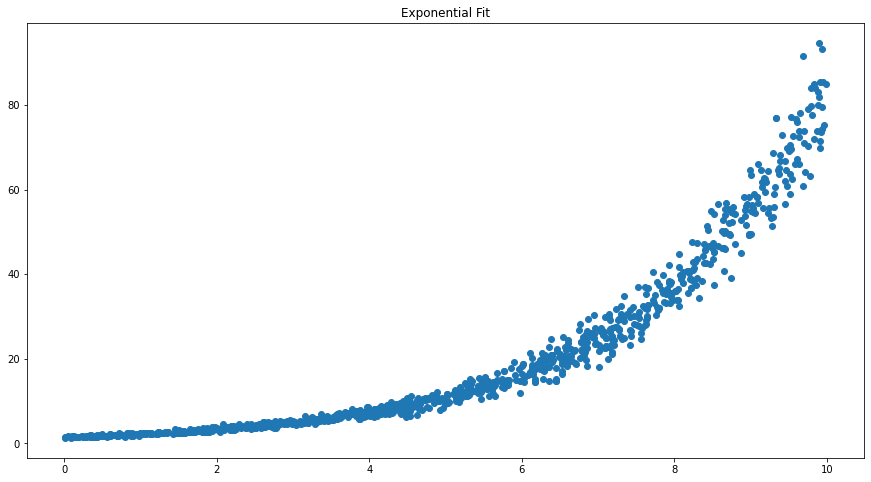

In [4]:
x = np.linspace(0,10,100)
y = np.e**(x*0.46)

fig, ax = plt.subplots(1,1,figsize=(15,8))
plt.title('Exponential Fit')
ax.scatter(p1_data['x'], p1_data['y'])

# ax.plot(x,y,'r' )
plt.show;

(a) Transforme su problema de regresión exponencial en uno de regresión lineal.

Para esto tomaremos la función original y aplicaremos ln() a ambos lados:

- Función original:
$$ y = \alpha e^{\beta x} $$

Aplicamos logaritmo natural ya que todos los datos $x$ e $y$ son positivos y diferentes de 0,

$$ \Longleftrightarrow ln(y) = ln(\alpha e^{\beta x})$$

$$ \Longleftrightarrow ln(y) = ln(\alpha) + ln(e^{\beta x}) $$

$$ \Longleftrightarrow ln(y) = ln(\alpha) + \beta x $$

$$ \Longleftrightarrow \hat{y} = ln(\alpha) + \beta x $$

$$ \Longleftrightarrow \hat{y} = \hat{\alpha} + \beta x $$


In [6]:
y_hat = list() # Creamos una lista vacía donde almacenaremos los nuevos valores de ln(y)

for num in p1_data['y']:
    y_hat.append(math.log(num))

print(y_hat[0:5])

[0.4030971043448457, 0.24591053162505316, 0.44962811979922945, 0.621810996480115, 0.4694918201854932]


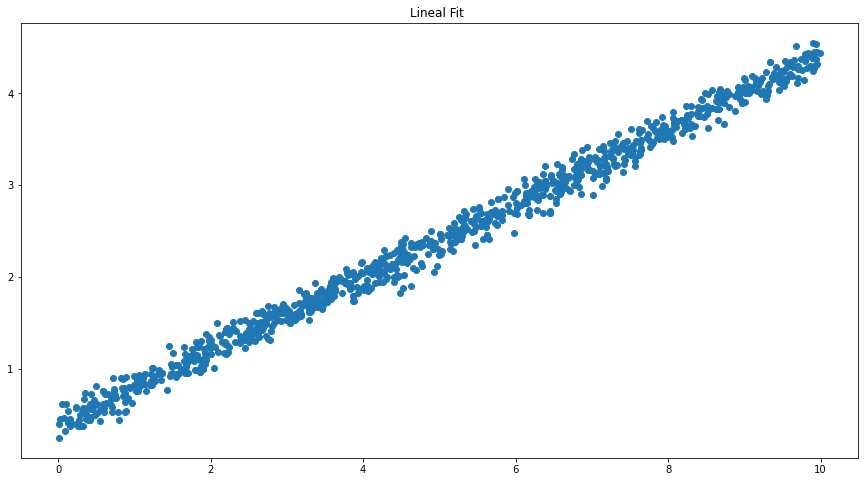

In [7]:
x = np.linspace(0,10,100)
y = math.log(1.5) + 0.4*x

fig, ax = plt.subplots(1,1,figsize=(15,8))
plt.title('Lineal Fit ')
ax.scatter(p1_data['x'], y_hat)

# ax.plot(x,y,'r' )
plt.show;

(b) Aplique lo visto en el curso para resolver el problema de regresón lineal.

Vamos a resolver este problema de regresión lineal usando el metodo de mínimos cuadrados (mean square error), es decir, calcularemos la función de error y la minimizaremos. 

In [8]:
X_sum = 0
Y_sum = 0
XY_sum = 0
Xsqr_sum = 0
n = p1_data.shape[0]

for i in range(n):
    x_i = p1_data['x'].iloc[i]
    y_i = y_hat[i]

    X_sum += x_i
    Y_sum += y_i
    XY_sum += x_i * y_i
    Xsqr_sum += x_i ** 2

In [11]:
X_sum , Y_sum, XY_sum, Xsqr_sum, n

(5031.900999999997,
 2413.2527326654463,
 15227.940617550754,
 33003.01578299998,
 1000)

In [9]:
beta = (XY_sum - (((Y_sum * X_sum)/n) )) / (Xsqr_sum - ((X_sum**2) /n))
beta

0.4014963624771722

In [10]:
alpha_hat = (Y_sum - beta * X_sum)/n
alpha_hat

0.39296278482020214

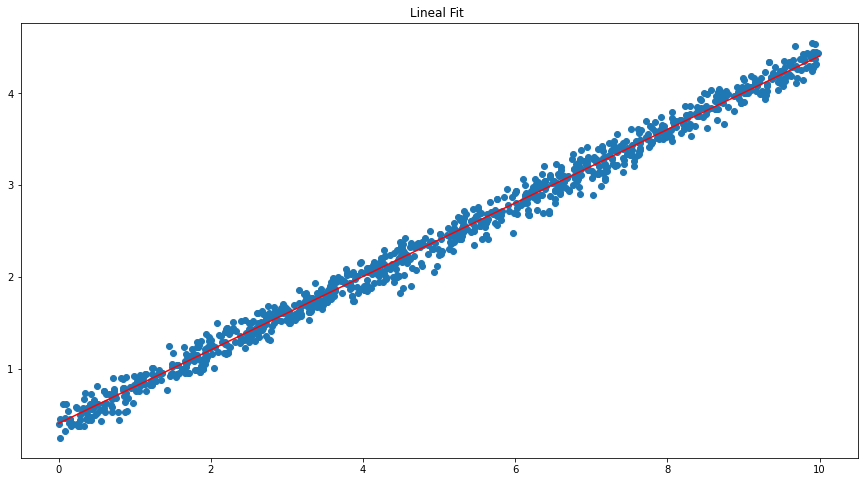

In [11]:
x = np.linspace(0,10,100)
y_gorrito = alpha_hat + beta*x

fig, ax = plt.subplots(1,1,figsize=(15,8))
plt.title('Lineal Fit ')
ax.scatter(p1_data['x'], y_hat)

ax.plot(x,y,'r' )
plt.show;

Tenemos alpha gorrito que es el logaritmo natural de alpha, ahora obtenemos alpha

In [13]:
alpha = math.e ** alpha_hat
alpha

1.4813632591033965

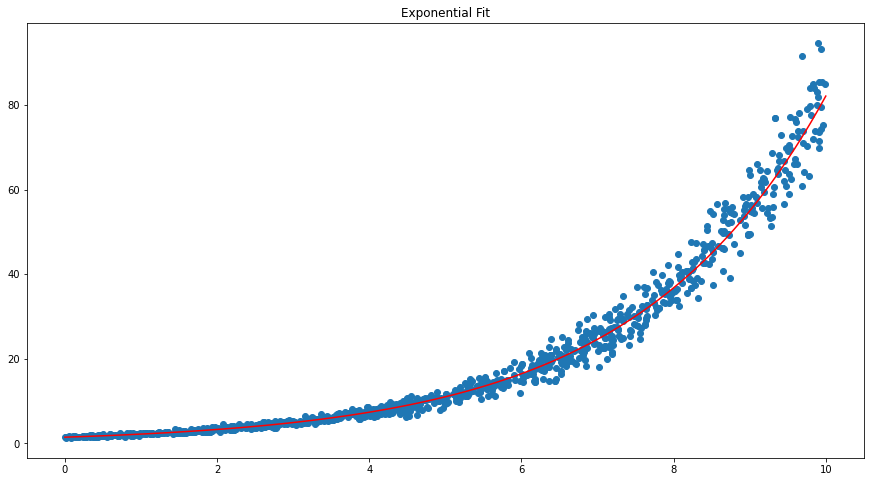

In [14]:
x = np.linspace(0,10,100)
y = alpha*np.e**(beta*x)

fig, ax = plt.subplots(1,1,figsize=(15,8))
plt.title('Exponential Fit')
ax.scatter(p1_data['x'], p1_data['y'])

ax.plot(x,y,'r' )
plt.show;

Así los valores de $\alpha$ y $\beta$ que buscabamos son:

- $\alpha = 1.4813632591033965 $

- $\beta = 0.4014963624771722 $

2. Red Neuronal

In [19]:
# pd.options.display.float_format = $'{:,.3f}'.format

p2_data = pd.read_csv('P2grupo_2.csv', delimiter=',')
p2_data.head()

,-0.8451113152558509,-3.2107932379128066,1.0
0,-3.333797,-0.992550,1.0
1,-3.177546,-3.166809,1.0
2,-3.526296,-3.646482,1.0
3,-2.340734,-1.109137,1.0
4,-4.071065,-3.820566,1.0


In [20]:
p2_columnas = list(p2_data.columns )
p2_data.loc[-1] = p2_columnas
p2_data.index = p2_data.index + 1 
p2_data.sort_index(inplace=True)
p2_data.columns = ['u', 'v', 'w']

p2_data = p2_data.apply(pd.to_numeric)


In [21]:
p2_data.head(6)

,u,v,w
0,-0.845111,-3.210793,1.0
1,-3.333797,-0.992550,1.0
2,-3.177546,-3.166809,1.0
3,-3.526296,-3.646482,1.0
4,-2.340734,-1.109137,1.0
5,-4.071065,-3.820566,1.0


(a) Considere la función de activación $\sigma(t) = arctanh(t)$ y encuentre una expresión sencilla para su derivada $\sigma^{'}(t)$.

https://www.youtube.com/watch?v=aAa3389z1p8

$$\sigma^{'}(t) = \frac{1}{1-t^2}$$

(b) Considerando los datos de entrenamiento $(u_i, v_i, w_i) \in \mathbb{R}^3$ construya $J = J(a,b,c,d,e)$ la función de pérdida del error cuadrático medio, como vimos en el ejemplo del curso, y calcule explícitamente su gradiente en un punto cualquiera $(a,b,c,d,e) \in \mathbb{R}^5 $

In [22]:
def sigma(valor):
    return math.atanh(valor)

$$ \frac{1}{n}\sum_{i}^{n}(y_i - (\ln(\alpha) + \beta x_i))^2 $$

$$ = \frac{1}{n}\sum_{i}^{n}(\hat{y}^2_i - 2\hat{y}_i\ln(\alpha) - 
    2\hat{y}_i\beta x_i + \ln^2(\alpha) + 2\ln(\alpha)\beta x_i + \beta^2 x^2_i $$

$$ M = \frac{1}{n}\sum_{i}^{n}\hat{y}^2_i - \frac{2\ln(\alpha)}{n}\sum_{i}^{n} \hat{y}_i - \frac{2\beta}{n} \sum_{i}^{n} \hat{y}_i x_i  + \ln^2(\alpha) + \frac{2\ln(\alpha)\beta}{n}\sum_{i}^{n} x_i + \frac{\beta^2}{n}\sum_{i}^{n} x^2_i $$

$$ \frac{\partial M}{\partial \alpha} = -\frac{2}{\alpha n}\sum_{i}^{n}\hat{y}_i + \frac{2\ln(\alpha)n}{n\alpha} + \frac{2\beta}{n\alpha}\sum_{i}^{n} x_i = 0 $$

$$ \frac{\partial M}{\partial \beta} = -\frac{2}{n}\sum_{i}^{n} \hat{y}_i x_i + \frac{2\ln(\alpha)}{n}\sum_{i}^{n}x_i + \frac{2\beta}{n}\sum_{i}^{n} x^2_i = 0 $$

            
$$ 1. \: - \sum_{i}^{n} \hat{y}_i + \ln(\alpha)n + \beta \sum_{i}^{n} x_i = 0 $$

$$ 2. \: - \sum_{i}^{n} \hat{y}_i x_i + \ln(\alpha)\sum_{i}^{n} x_i + \beta \sum_{i}^{n} x^2_i = 0 $$

$$ \arctan h(x)' = \frac{1}{1 - x^2} $$

$$ \theta(ax_1 + bx_2 + d) = \arctan h(ax_1 + bx_2 + d) $$

$$ \Longrightarrow \theta(ax_1 + bx_2 + d)' = \frac{1}{1-(ax_1 + bx_2 + d)^2} $$

$$ = a^2x^2_1 + ab x_1x_2 + ax_1d + b a x_1x_2 + b^2x^2_2 + db x_2 + d a x_1 + db x_2 + d^2 $$

$$ = a^2 x^2_1 + b^2x^2_2 + d^2 + 2ab x_1x_2 + 2ad x_1 + 2db x_2 $$

$$ M = \frac{1}{n}\sum_{i=1}^{n} \left[W^2_i - 2W_i \: \theta(c \: \theta(a u_i + b v_i + d) + e) + \theta(c \: \theta(a u_i + b v_i + d) + e)^2 \right] $$

$$ M = \frac{1}{n}\sum_{i=1}^{n} W^2_i - \frac{2}{n}\sum_{i=1}^{n} \left[W_i \: \theta(c \: \theta(a u_i + b v_i + d) + e)\right] + \frac{1}{n}\sum_{i=1}^{n} \theta(a u_i + b v_i + d) + e)^2 $$

$$ \frac{\partial M}{\partial a} = - \frac{2}{n}\sum_{i=1}^{n} \left[W_i \: \theta'(\lambda) \: c \: \theta'(t) \: u_i \right] + \frac{2}{n}\sum_{i=1}^{n} \left[\theta(\lambda) \: \theta'(\lambda) \: c \: \theta'(t) \: u_i \right] $$

$$ = - \frac{2}{n} \sum_{i=1}^{n} \left[ W_i \frac{c}{1 - (c \: \theta(a u_i + b v_i + d) + e)^2} \times \frac{u_i}{1 - (a u_i + b v_i + d)^2} \right] + \frac{2}{n} \sum_{i=1}^{n} \left[ \frac{\theta(c \: \theta(a u_i + b v_i + d) + e)}{1 - (c \: \theta(a u_i + b v_i + d) + e)^2} \times \frac{c \: u_i}{1 - (a u_i + b v_i + d)^2} \right] $$

$$ = \frac{2}{n} \sum_{i=1}^{n} \left[ \frac{- W_i \: c}{1 - (c \: \theta(a u_i + b v_i + d) + e)^2} \times \frac{u_i}{1 - (a u_i + b v_i + d)^2} + \frac{ \theta(c \: \theta(a u_i + b v_i + d) + e)}{1 - (c \: theta(a u_i + b v_i + d) + e)^2} \times \frac{c \: u_i}{1 - (a u_i + b v_i + d)^2} \right] $$

$$ \frac{\partial M}{\partial a} = \frac{2}{n} \sum_{i=1}^{n} \left[\frac{c \: u_i(-W_i + \theta(c \: \theta(a u_i + b v_i + d) + e))}{1 - (c \: \theta(a u_i + b v_i + d) + e)^2 \times 1 - (a u_i + b v_i + d)^2} \right] $$

$$ M = \frac{1}{n} \sum_{i=1}^{n} W^2_i - \frac{2}{n} \sum_{i=1}^{n} \left[W_i \: \theta (c \: \theta(a u_i + b v_i + d) + e) \right] + \frac{1}{n} \sum_{i=1}^{n} \theta(c \: \theta(a u_i + b v_i + d) + e)^2 $$

$$ \frac{\partial M}{\partial b} = \frac{2}{n} \sum_{i=1}^{n} \left[\frac{c \: v_i(-W_i + \theta(c \: \theta(a u_i + b v_i + d) + e))}{1 - (c \: \theta(a u_i + b v_i + d) + e)^2 \times 1 -(a u_i + b v_i + d)^2} \right] $$

$$ \frac{\partial M}{\partial d} = \frac{2}{n} \sum_{i=1}^{n} \left[ \frac{c \: (-W_i + \theta(c \: \theta(a u_i + b v_i + d) + e))}{1 - (c \: \theta(a u_i + b v_i + d) + e)^2 \times 1 -(a u_i + b v_i + d)^2} \right] $$

$$ M = \frac{1}{n} \sum_{i=1}^{n} W^2_i - \frac{2}{n} \sum_{i=1}^{n} \left[W_i \: \theta(a u_i + b v_i + d) + e)\right] + \frac{1}{n} \sum_{i=1}^{n} \theta(c \: \theta(a u_i + b v_i + d) + e)^2 $$

$$ \frac{\partial M}{\partial c} = \frac{2}{n} \left[ - \sum_{i=1}^{n} (W_i \: \theta'(\lambda) \: \theta(t)) + \sum_{i=1}^{n} (\theta(\lambda) \: \theta(t)) \right] = \frac{2}{n} \left[\sum_{i=1}^{n} W_i \: \theta'(\lambda) + \sum_{i=1}^{n} \theta(\lambda) \right] $$

$$ = \frac{2}{n} \sum_{i=1}^{n} - \left[ \frac{W_i \: \theta (a u_i + b v_i + d)}{1 - (c \: \theta(a u_i + b v_i + d) + e)^2} + \theta(c \: \theta(a u_i + b v_i + 0) + e) \right] \times \theta(a u_i + b v_i + d) $$

$$ \frac{\partial M}{\partial e} = \frac{2}{n} \left[ \sum_{i=1}^{n} W_i \: \theta'(\lambda) + \sum_{i=1}^{n} \theta(\lambda) \right] $$

$$ = \frac{2}{n} \left[ \sum_{i=1}^{n} \frac{- W_i}{1 - (c \: \theta \: a u_i + b v_i + d + e)^2} + \theta(c \: \theta \: a u_i + b v_i + d + e) \right] $$

$$ \nabla J = \left( \frac{\partial J}{\partial a} , \frac{\partial J}{\partial b} , \frac{\partial J}{\partial c} , \frac{\partial J}{\partial d} , \frac{\partial J}{\partial e}\right) $$

In [41]:
n = p2_data.shape[0]

def J(a,b,c,d,e):
    result = 0
    try:
        for i in range(n):
            w_i = p2_data.iloc[i]['w']
            u_i = p2_data.iloc[i]['u']
            v_i = p2_data.iloc[i]['v']

            result += w_i**2
            result -= 2*w_i* sigma(c * sigma(a*u_i + b*v_i + d) + e)
            result += sigma(c * sigma(a*u_i + b * v_i + d) + e) **2
    except ValueError as buu:
        return buu


    return (1/n)* (result)

In [43]:
J(0,0,0,0,0)

1.0

In [102]:
def derivada_parcial_a(data,a_0,b_0,c_0,d_0,e_0):
    n = data.shape[0]

    total = 0
    for i in range(n):
        u = data.iloc[i]['u']
        v = data.iloc[i]['v']
        w = data.iloc[i]['w']

        numerador = c_0 * u * (-w + sigma(c_0 * sigma(a_0 * u + b_0 * v + d_0) + e_0))
        denominador = 1- (c_0 * sigma(a_0 * u + b_0 * v + d_0) + e_0)**2 * (1- (a_0 * u + b_0 * v + d_0)**2)

        fraccion = numerador / denominador

        total += fraccion
    
    return (2/n)* total

def derivada_parcial_b(data,a_0,b_0,c_0,d_0,e_0):
    n = data.shape[0]

    total = 0
    for i in range(n):
        u = data.iloc[i]['u']
        v = data.iloc[i]['v']
        w = data.iloc[i]['w']

        numerador = c_0 * v * (-w + sigma(c_0 * sigma(a_0 * u + b_0 * v + d_0) + e_0))
        denominador = 1- (c_0 * sigma(a_0 * u + b_0 * v + d_0) + e_0)**2 * (1- (a_0 * u + b_0 * v + d_0)**2)

        fraccion = numerador / denominador

        total += fraccion
    
    return (2/n)* total

def derivada_parcial_c(data,a_0,b_0,c_0,d_0,e_0):
    n = data.shape[0]

    total = 0
    for i in range(n):
        u = data.iloc[i]['u']
        v = data.iloc[i]['v']
        w = data.iloc[i]['w']

        numerador = -((w * sigma(a_0 * u + b_0 * v + d_0))/(1-(c_0 * sigma(a_0 * u + b_0 * v + d_0) + e_0))) + (sigma(c_0 * sigma(a_0 * u + b_0 * v + d_0) + e_0) * sigma(a_0 * u +b_0 * v + d_0))
        denominador = None

        fraccion = numerador

        total += fraccion
    
    return (2/n)* total

def derivada_parcial_d(data,a_0,b_0,c_0,d_0,e_0):
    n = data.shape[0]

    total = 0
    for i in range(n):
        u = data.iloc[i]['u']
        v = data.iloc[i]['v']
        w = data.iloc[i]['w']

        numerador = c_0 * (-w + sigma(c_0 * sigma(a_0 * u + b_0 * v + d_0) + e_0))
        denominador = (1 - (c_0 * sigma(a_0 * u + b_0 * v +d_0) + e_0)**2) * (1- (a_0 * u + b_0 * v + d_0)**2)

        fraccion = numerador / denominador

        total += fraccion
    
    return (2/n)* total

def derivada_parcial_e(data,a_0,b_0,c_0,d_0,e_0):
    n = data.shape[0]

    total = 0
    for i in range(n):
        u = data.iloc[i]['u']
        v = data.iloc[i]['v']
        w = data.iloc[i]['w']

        numerador = ((-w)/(1- (c_0 * sigma(a_0 * u + b_0 * v + d_0) + e_0)**2)) + sigma(c_0 * sigma(a_0 * u + b_0 * v + d_0) + e_0)


        fraccion = numerador 

        total += fraccion
    
    return (2/n)* total



def Grad(data, a_0, b_0, c_0, d_0, e_0):
    n = data.shape[0]

    # d_a = derivada_parcial_a(data,a_0,b_0,c_0,d_0,e_0)
    # d_b = derivada_parcial_b(data,a_0,b_0,c_0,d_0,e_0)
    # d_c = derivada_parcial_c(data,a_0,b_0,c_0,d_0,e_0)
    # d_d = derivada_parcial_d(data,a_0,b_0,c_0,d_0,e_0)
    # d_e = derivada_parcial_e(data,a_0,b_0,c_0,d_0,e_0)

    total_a = 0
    total_b = 0
    total_c = 0
    total_d = 0
    total_e = 0

    for i in range(n):
        u = data.iloc[i]['u']
        v = data.iloc[i]['v']
        w = data.iloc[i]['w']

        #derivada de a
        numerador_a = c_0 * u * (-w + sigma(c_0 * sigma(a_0 * u + b_0 * v + d_0) + e_0))
        denominador_a = 1- (c_0 * sigma(a_0 * u + b_0 * v + d_0) + e_0)**2 * (1- (a_0 * u + b_0 * v + d_0)**2)

        fraccion_a = numerador_a / denominador_a

        total_a += fraccion_a

        #---------
        #derivada de b
        numerador_b = c_0 * v * (-w + sigma(c_0 * sigma(a_0 * u + b_0 * v + d_0) + e_0))
        denominador_b = 1- (c_0 * sigma(a_0 * u + b_0 * v + d_0) + e_0)**2 * (1- (a_0 * u + b_0 * v + d_0)**2)

        fraccion_b = numerador_b / denominador_b

        total_b += fraccion_b
        #---------

        #derivada de c

        numerador_c = -((w * sigma(a_0 * u + b_0 * v + d_0))/(1-(c_0 * sigma(a_0 * u + b_0 * v + d_0) + e_0))) + (sigma(c_0 * sigma(a_0 * u + b_0 * v + d_0) + e_0) * sigma(a_0 * u +b_0 * v + d_0))
        denominador_c = None

        fraccion_c = numerador_c

        total_c += fraccion_c

        #---------
        #derivada de d

        numerador_d = c_0 * (-w + sigma(c_0 * sigma(a_0 * u + b_0 * v + d_0) + e_0))
        denominador_d = (1 - (c_0 * sigma(a_0 * u + b_0 * v +d_0) + e_0)**2) * (1- (a_0 * u + b_0 * v + d_0)**2)

        fraccion_d = numerador_d / denominador_d

        total_d += fraccion_d

        #---------

        #derivada de e

        numerador_e = ((-w)/(1- (c_0 * sigma(a_0 * u + b_0 * v + d_0) + e_0)**2)) + sigma(c_0 * sigma(a_0 * u + b_0 * v + d_0) + e_0)
        fraccion_e = numerador_e 

        total_e += fraccion_e
        #---------

    d_a = total_a * (2/n)
    d_b = total_b * (2/n)
    d_c = total_c * (2/n)
    d_d = total_d * (2/n)
    d_e = total_e * (2/n)

    jota = 0
    jota += w**2
    jota -= 2*w* sigma(c_0 * sigma(a_0*u + b_0 * v + d_0) + e_0)
    jota += sigma(c_0 * sigma(a_0* + b_0 *v + d_0) + e_0) **2


    gradiente = [d_a, d_b, d_c, d_d, d_e]
    return gradiente, jota

In [103]:
Grad(p2_data, 0.05,0.005,0.222,0,-0.2)[0]

[0.0690518402310042,
 0.06741987216683737,
 0.013956555923594238,
 -0.06869963893266837,
 -0.2757071013164829]

In [117]:
def GradiantDescent(data, a_0, b_0, c_0 , d_0, e_0, epsilon = 0.1, maximo=1000):
    vector_0 = [a_0, b_0, c_0, d_0, e_0]
    vector_k = vector_0.copy()
    error = list()
    for i in range(maximo):
        if (i+1)%100 == 0:
            print(f'paso {i+1}')
        # error_j = J(*vector_k)
        gradiente, error_j = Grad(data ,*vector_k)

        vector_k = [vector_k[x] - epsilon * gradiente[x] for x in range(5)]
        error.append((i, error_j))
    
    return vector_k, error



In [118]:
vector_resultado, evolucion_error = GradiantDescent(p2_data, 0.05,0.005,0.222,0,-0.2)

paso 100
paso 200
paso 300
paso 400
paso 500
paso 600
paso 700
paso 800
paso 900
paso 1000


In [126]:
vector_resultado

[-0.0040039476953200185,
 -0.022514114733563746,
 0.5934608745283015,
 0.2676233887758117,
 -0.22570737158807513]

In [127]:
evolucion_error[-1]

(999, 0.8868827125617674)

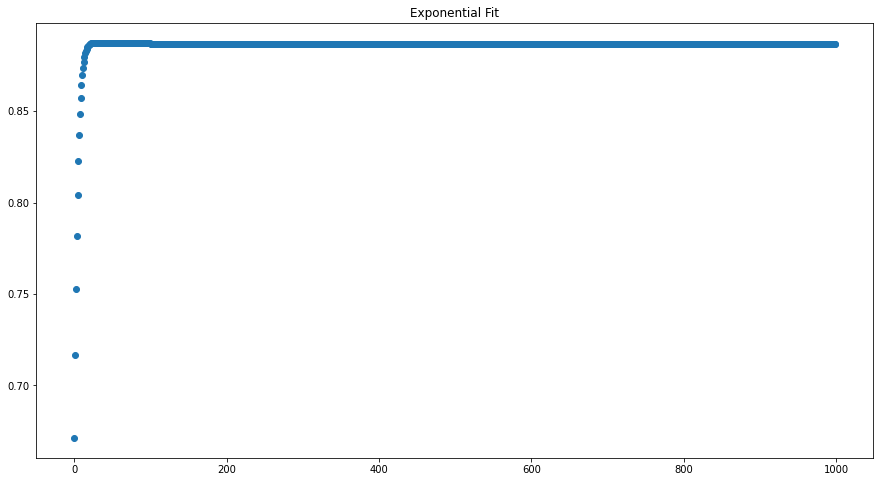

In [128]:
x = np.linspace(0,10,100)
y = alpha*np.e**(beta*x)

fig, ax = plt.subplots(1,1,figsize=(15,8))
plt.title('Exponential Fit')
ax.scatter(*zip(*evolucion_error))

plt.show;